# ESTE MODELO PEGA ALTAS NOTAS MAS N SEI PQ 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic = pd.read_csv("titanic_train.csv")
titanic_test = pd.read_csv("titanic_test.csv")

   **Working with data**              
**1.** Delete passengerId column, its not relevant for the regression

In [7]:
del titanic['PassengerId']

**2.** Sex column might not be categorical

In [8]:
sex_new = pd.get_dummies(titanic['Sex'],drop_first=True)
del titanic['Sex']
titanic['male'] = sex_new

In [9]:
sex_new_t = pd.get_dummies(titanic_test['Sex'],drop_first=True)
del titanic_test['Sex']
titanic_test['male'] = sex_new_t

**3.** Embarked column might not be categorical

In [10]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
titanic_test['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [12]:
len(titanic[titanic['Embarked'].isnull()])

2

In [13]:
len(titanic_test[titanic_test['Embarked'].isnull()])

0

We have 2 null values at Embarked and need to drop this lines or fill with something, forward we treat them

In [14]:
embark_new = pd.get_dummies(titanic['Embarked'],drop_first=True)
del titanic['Embarked']

In [15]:
embark_new_t = pd.get_dummies(titanic_test['Embarked'],drop_first=True)
del titanic_test['Embarked']

In [16]:
titanic = pd.concat([titanic, embark_new], axis = 1)

In [17]:
titanic_test = pd.concat([titanic_test, embark_new_t], axis = 1)

**4.** Now, lets see how to treat the NaN values

In [20]:
len(titanic[titanic['Cabin'].isnull()])

687

In [21]:
len(titanic_test[titanic_test['Cabin'].isnull()])

327

In [22]:
len(titanic[titanic['Age'].isnull()])

177

In [23]:
len(titanic_test[titanic_test['Age'].isnull()])

86

Here we can see, how much fields at each column is NaN

At this analysis, we do not consider Cabin and ticket

In [24]:
del titanic['Cabin']
del titanic_test['Cabin']

In [25]:
del titanic['Ticket']
del titanic_test['Ticket']

Method to fill the Age Column                           
Lets cross the variables Pclass and Age, and see if there is some logic

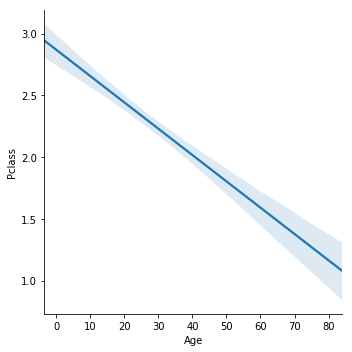

In [26]:
sns.lmplot( x = 'Age', y = 'Pclass', data = titanic, scatter_kws = {'s':0})

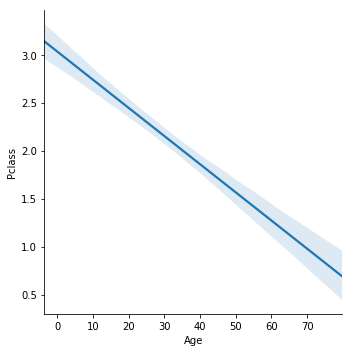

In [27]:
sns.lmplot( x = 'Age', y = 'Pclass', data = titanic_test, scatter_kws = {'s':0})

Here we can clearly see, when the passengers have more age, better is their Pclass, so its a good parameter to fill the Null ages

In [28]:
First_class_age  = titanic[titanic['Pclass'] == 1]['Age'].mean()
Second_class_age = titanic[titanic['Pclass'] == 2]['Age'].mean()
thrid_class_age  = titanic[titanic['Pclass'] == 3]['Age'].mean()

In [29]:
def fillAges(Columns):
    Age = Columns[0]
    Pclass = Columns[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return First_class_age
        elif Pclass ==2:
            return Second_class_age
        else:
            return thrid_class_age
    else:
        return Age
        

In [30]:
titanic_test['Age'] = titanic_test[['Age','Pclass']].apply(fillAges, axis=1)
titanic['Age'] = titanic[['Age','Pclass']].apply(fillAges, axis=1)

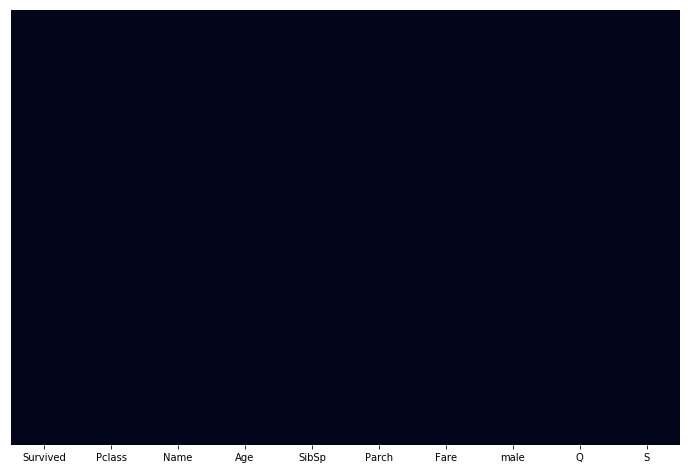

In [31]:
plt.subplots(figsize=(12,8))
sns.heatmap(titanic.isnull(), cbar = False, yticklabels=False)

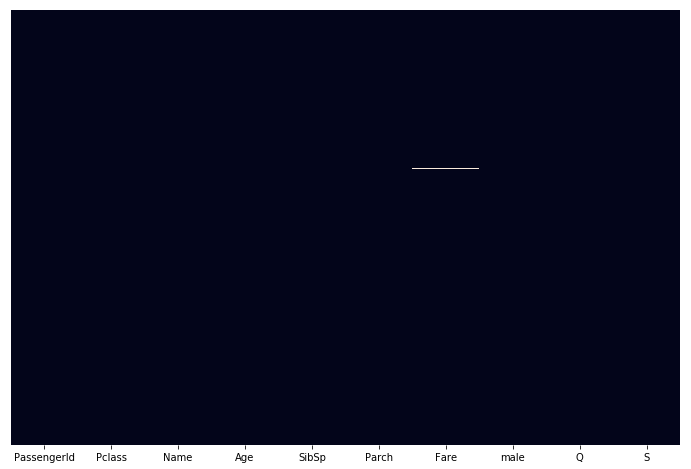

In [32]:
plt.subplots(figsize=(12,8))
sns.heatmap(titanic_test.isnull(), cbar = False, yticklabels=False)

In [33]:
titanic_test[titanic_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Age,SibSp,Parch,Fare,male,Q,S
152,1044,3,"Storey, Mr. Thomas",60.5,0,0,NaN,1,0,1


In [34]:
titanic_test[titanic_test['Pclass'] == 3]['Fare'].mean()

12.459677880184334

# AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

In [35]:
titanic_test['Fare'] = titanic_test['Fare'].fillna(value = 12.459677880184334);

In [36]:
titanic2 = titanic
titanic3 = titanic_test

In [37]:
sigla = titanic2['Name'].apply(lambda x: x.split(',')[1])
sigla_t = titanic3['Name'].apply(lambda x: x.split(',')[1])

In [38]:
sigla2 = sigla.apply(lambda x: x.split('.')[0])
sigla2_t = sigla_t.apply(lambda x: x.split('.')[0])

In [39]:
siglas_new = pd.get_dummies(sigla2,drop_first=True)
del titanic['Name']
titanic = pd.concat([titanic, siglas_new], axis = 1)

In [40]:
siglas_newt = pd.get_dummies(sigla2_t,drop_first=True)
del titanic_test['Name']
titanic_test = pd.concat([titanic_test, siglas_newt], axis = 1)

# REGRESSAO

In [41]:
dona = pd.DataFrame(np.zeros((891, 1)))
dona.columns = ['Dona']
Master = pd.DataFrame(np.zeros((891, 1)))
Master.columns = ['Master']
Miss = pd.DataFrame(np.zeros((891, 1)))
Miss.columns = ['Miss']
titanic = pd.concat([titanic, dona, Master, Miss ], axis = 1)

In [57]:
Col = pd.DataFrame(np.zeros((418 , 1)))
Col.columns = ['Col']

Don = pd.DataFrame(np.zeros((418 , 1)))
Don.columns = ['Don']

Jonkheer = pd.DataFrame(np.zeros((418 , 1)))
Jonkheer.columns = ['Jonkheer']

Lady = pd.DataFrame(np.zeros((418 , 1)))
Lady.columns = ['Lady']

Major = pd.DataFrame(np.zeros((418 , 1)))
Major.columns = ['Major']

Master = pd.DataFrame(np.zeros((418 , 1)))
Master.columns = ['Master']

Miss = pd.DataFrame(np.zeros((418 , 1)))
Miss.columns = ['Miss']

Mlle = pd.DataFrame(np.zeros((418 , 1)))
Mlle.columns = ['Mlle']

Mme = pd.DataFrame(np.zeros((418 , 1)))
Mme.columns = ['Mme']

Sir = pd.DataFrame(np.zeros((418 , 1)))
Sir.columns = ['Sir']

theCountess = pd.DataFrame(np.zeros((418 , 1)))
theCountess.columns = ['the Countess']
titanic_test = pd.concat([titanic_test, Col, Don, Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Sir,theCountess ], axis = 1)

In [59]:
titanic_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Dona,...,Don,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Sir,the Countess
0,892,3,34.5,0,0,7.8292,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,893,3,47.0,1,0,7.0000,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,894,2,62.0,0,0,9.6875,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,895,3,27.0,0,0,8.6625,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,896,3,22.0,1,1,12.2875,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


from sklearn.model_selection import train_test_split

titanic.shape

X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived',axis=1), 
                                                    titanic['Survived'], test_size=0.40, 
                                                    random_state=101)

from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)


from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

from sklearn.metrics import accuracy_score


print(accuracy_score(y_test,predictions))

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,predictions))

print('The training score for logistic regression is:',(logmodel.score(X_train,y_train)*100),'%')


# Make predictions on the test set

predictions = logmodel.predict(titanic_test.drop('PassengerId', axis = 1))
submission = pd.DataFrame({
        "PassengerId": titanic_test['PassengerId'],
        "Survived": predictions
    })
submission.to_csv('ztitanic.csv', index=False)

from sklearn import model_selection
scores = model_selection.cross_val_score(logmodel, titanic.drop('Survived',axis=1), titanic['Survived'], cv=5)
print(scores.mean())

In [45]:
X_train = titanic.drop(["Survived"], axis=1)
Y_train = titanic["Survived"]
X_test  = titanic_test.drop(["PassengerId"], axis=1)

In [48]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=100, shuffle=True, random_state=0)
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, Y_train)
Y_pred = logistic.predict(X_test)
acc_log = round(logistic.score(X_train, Y_train) * 100, 2)
score_lr = cross_val_score(logistic, X_train, Y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy')
print('Logistic Cross: {}\nLogistic:       {}'.format(round(np.mean(score_lr)*100,2), acc_log))

Logistic Cross: 82.51
Logistic:       83.28


In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
score_knn = cross_val_score(knn, X_train, Y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy')
print('KNN Cross: {}\nKNN:       {}'.format(round(np.mean(score_knn)*100,3), acc_knn))

KNN Cross: 72.847
KNN:       84.18


In [55]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
score_dt = cross_val_score(decision_tree, X_train, Y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy')
print('Decision Tree Cross: {}\nDecision Tree:       {}'.format(round(np.mean(score_dt)*100,2), acc_decision_tree))

Decision Tree Cross: 79.08
Decision Tree:       98.43


In [64]:
submission = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission11111.csv', index=False)

In [62]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
score_rf = cross_val_score(random_forest, X_train, Y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy')
print('Random Forest Cross: {}\nRandom Forest:       {}'.format(round(np.mean(score_rf)*100,2), acc_random_forest))

Random Forest Cross: 81.01
Random Forest:       98.43
